<a href="https://colab.research.google.com/github/acodeforone/22projects/blob/main/05_Boston_Housing_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boston Housing Price Predictor
* Even though it’s a small dataset, it’s actually deprecated in scikit-learn for ethical reasons (it contains a variable related to race), so we’ll load it from another source instead. I’ll still use it for learning purposes because it’s clean, small, and perfect for showing regression concepts — but I’ll add a note in the notebook about why it’s deprecated and that it should not be used in production.

* The classic Boston Housing dataset includes a variable tied to race (“B”) and a binary “CHAS” river‑adjacency proxy used historically in potentially biased ways. Because of that, load_boston was removed from scikit‑learn. It’s still fine for learning regression mechanics, but don’t use it to build real‑world models.

* This exercise teaches us Linear Regression method for Housing Price prediction.

# 0. Imports and Loading Data

In [1]:
# --- Step 1: Setup & Load Boston Housing (via OpenML, with UCI fallback) ---

import pandas as pd
import numpy as np

# plotting libs for later steps (already available in Colab)
import matplotlib.pyplot as plt
import seaborn as sns

# we'll use scikit-learn to fetch the dataset
from sklearn.datasets import fetch_openml

def load_boston_as_dataframe():
    try:
        # OpenML copy of the dataset (works even though load_boston is deprecated)
        boston = fetch_openml(name="boston", version=1, as_frame=True)
        df = boston.frame.copy()
        # Ensure target column is named MEDV (median value)
        if "MEDV" not in df.columns and boston.target is not None:
            df["MEDV"] = boston.target
        return df
    except Exception as e:
        # Fallback to UCI (requires internet; Colab usually has it)
        url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
        names = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"]
        df = pd.read_csv(url, delim_whitespace=True, names=names)
        return df

df = load_boston_as_dataframe()


/usr/local/lib/python3.11/dist-packages/sklearn/datasets/_openml.py:110: UserWarning: A network error occurred while downloading https://api.openml.org/data/v1/download/52643. Retrying...
  warn(
/tmp/ipython-input-423754535.py:26: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, names=names)


In [2]:

print("Shape:", df.shape)         # expect (506, 14)


Shape: (506, 14)


In [3]:
print("\nColumns:", list(df.columns))



Columns: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


In [4]:
print("\nMissing values per column:\n", df.isna().sum())



Missing values per column:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [5]:
print("\nDuplicate rows:", df.duplicated().sum())



Duplicate rows: 0


In [6]:

# Peek
display(df.head())


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# 1. EDA
What to Look For:

* Distribution of MEDV → check for skew, outliers, and ceiling effect at $50k (common in this dataset).

* Correlation heatmap → see which features strongly correlate with MEDV.

* Top positive correlation is usually RM (avg. rooms per dwelling).

* Top negative correlation is often LSTAT (lower status population %).

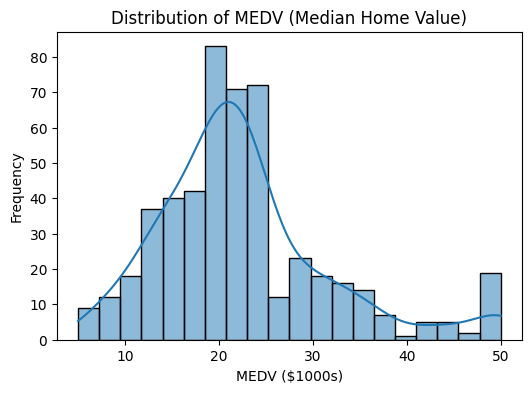

In [8]:
# --- Step 2: Quick EDA for Regression ---

# 1. Target variable distribution
plt.figure(figsize=(6,4))
sns.histplot(df['MEDV'], bins=20, kde=True)
plt.title("Distribution of MEDV (Median Home Value)")
plt.xlabel("MEDV ($1000s)")
plt.ylabel("Frequency")
plt.show()


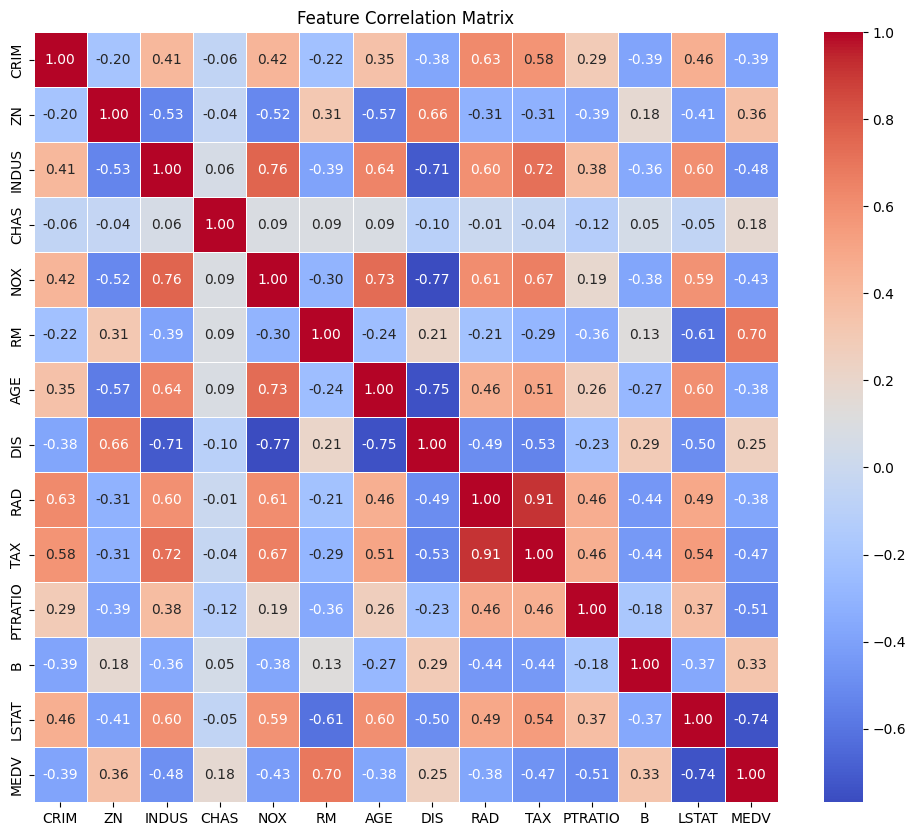

In [9]:

# 2. Correlation matrix (Pearson correlation)
plt.figure(figsize=(12,10))
corr_matrix = df.corr(numeric_only=True)  # only numeric cols
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


In [10]:

# 3. Top correlated features with target
target_corr = corr_matrix['MEDV'].drop('MEDV').sort_values(ascending=False)
print("Top positively correlated features:\n", target_corr.head(3), "\n")
print("Top negatively correlated features:\n", target_corr.tail(3), "\n")


Top positively correlated features:
 RM    0.695360
ZN    0.360445
B     0.333461
Name: MEDV, dtype: float64 

Top negatively correlated features:
 INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64 



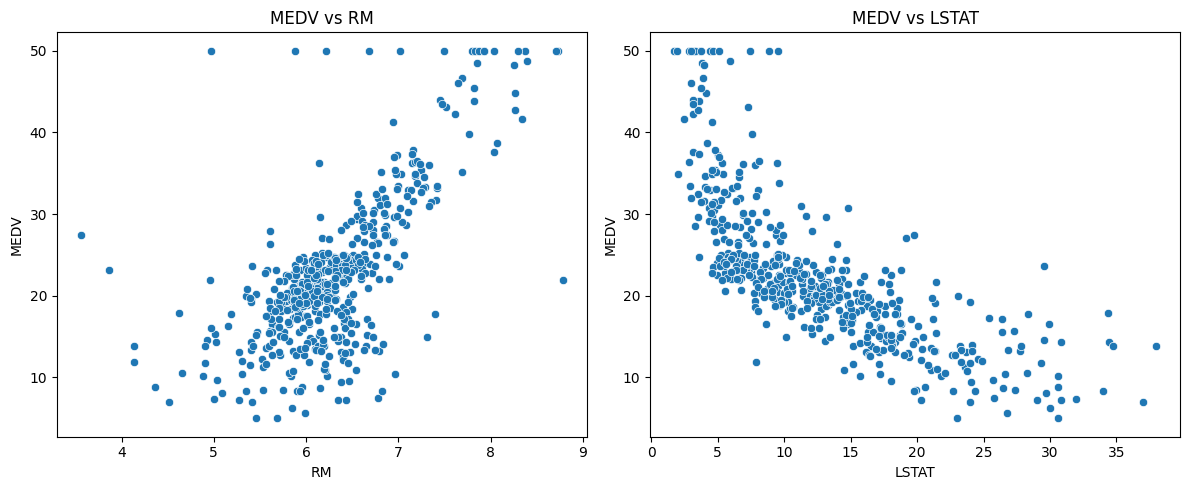

In [11]:

# 4. Scatter plots for the top 2 correlated features (positive and negative)
top_pos = target_corr.index[0]
top_neg = target_corr.index[-1]

fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.scatterplot(x=df[top_pos], y=df['MEDV'], ax=axes[0])
axes[0].set_title(f"MEDV vs {top_pos}")

sns.scatterplot(x=df[top_neg], y=df['MEDV'], ax=axes[1])
axes[1].set_title(f"MEDV vs {top_neg}")

plt.tight_layout()
plt.show()


# Task
Perform data preprocessing (scaling and optional polynomial features), train and evaluate a Linear Regression model, train and evaluate a RandomForestRegressor model, compare their performance, interpret the Linear Regression coefficients, discuss model applicability, and identify dataset limitations based on the provided notebook steps.

## Data preprocessing

### Subtask:
Scale the features using `StandardScaler` and optionally generate polynomial features.


**Reasoning**:
Separate features and target, then scale the features using StandardScaler.



## 1. Data Preprocessing

Separate features (X) and target (y).

In [12]:
# Separate features (X) and target (y)
X = df.drop('MEDV', axis=1)
y = df['MEDV']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (506, 13)
Target shape: (506,)


Scale the features using `StandardScaler`.

In [13]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the features and transform
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame (optional, but good for inspection)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("\nScaled Features (first 5 rows):\n")
display(X_scaled_df.head())


Scaled Features (first 5 rows):



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


## 2. Model Training (Linear Regression)

Train a Linear Regression model on the scaled data.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

print("Linear Regression model trained.")

Linear Regression model trained.


## 3. Model Evaluation (Linear Regression)

Evaluate the Linear Regression model using MAE, MSE, RMSE, and R² score.

In [15]:
# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression Performance:")
print(f"  MAE: {mae_linear:.2f}")
print(f"  MSE: {mse_linear:.2f}")
print(f"  RMSE: {rmse_linear:.2f}")
print(f"  R² Score: {r2_linear:.2f}")

Linear Regression Performance:
  MAE: 3.19
  MSE: 24.29
  RMSE: 4.93
  R² Score: 0.67


### How to Interpret:
* MAE (Mean Absolute Error)
  * average difference between predicted and actual prices in $1000’s (so MAE=3 means ~$3000 average error).
  * Meaning: The average of the absolute differences between the predicted value and the true value.
  * Units: Same as the target variable (e.g., housing prices in $1000’s).
  * Theoretical angle: Measures the expected absolute deviation of predictions from reality. It’s the L1 loss in optimization terms.
  * Lower is better — 0 means perfect prediction.
  * Good for: Understanding the “average miss” in real-world units; less sensitive to extreme outliers than MSE/RMSE.

* MSE (Mean Squared Error)
  * penalizes large errors more, but less interpretable in real-world units.
  * Meaning: The average of the squared differences between predicted and true values.
  * Units: Squared units of the target (e.g., $($1000)^2$ in housing).
  * Theoretical angle: This is the variance + bias² of the error term under certain assumptions. It’s the L2 loss in optimization.
  * Lower is better — 0 means perfect prediction.
  * Good for: Penalizing large errors heavily (because squaring makes big misses dominate the metric).
  * Downside: Harder to interpret in real-world units.

* RMSE: square root of MSE
  * same unit as target (like MAE but penalizes big misses more).
  * Meaning: The square root of the MSE, bringing it back to the same units as the target.
  * Theoretical angle: Similar to the standard deviation of the residuals (prediction errors), assuming errors are unbiased.
  * Lower is better — 0 means perfect prediction.
  * Good for: When you want to both penalize large errors and still keep the metric in real-world units.
  * Rule of thumb: RMSE ≥ MAE; the larger the gap, the more extreme the outliers.

* R² Score
  * proportion of variance in the target explained by the model.
  * 1.0 → perfect fit
  * 0.0 → no better than predicting the mean
  * Negative → worse than mean prediction
  * Meaning: Proportion of variance in the target variable explained by the model.
  * Theoretical angle: Compares the model’s error against the error you’d get by just predicting the mean for every case.
  * Higher is better —
  * 1.0 → perfect fit
  * 0.0 → model no better than mean prediction
  * < 0.0 → model worse than predicting the mean.
  * **Good for:** Quick, dimensionless measure of model fit; intuitive for explaining “how much of the variation we capture.”

## 4. Model Training (Random Forest)

Train a RandomForestRegressor model.

In [21]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the RandomForestRegressor model
# Using a random_state for reproducibility
forest_model = RandomForestRegressor(
    n_estimators=200,  # number of trees
    random_state=42,
    n_jobs=-1          # use all CPU cores
)
forest_model.fit(X_train, y_train)

print("RandomForestRegressor model trained.")

RandomForestRegressor model trained.


## 5. Model Evaluation (Random Forest)

Evaluate the Random Forest model using MAE, MSE, RMSE, and R² score.

In [22]:
# Make predictions on the test set
y_pred_forest = forest_model.predict(X_test)

# Evaluate the model
mae_forest = mean_absolute_error(y_test, y_pred_forest)
mse_forest = mean_squared_error(y_test, y_pred_forest)
rmse_forest = np.sqrt(mse_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print(f"RandomForestRegressor Performance:")
print(f"  MAE: {mae_forest:.2f}")
print(f"  MSE: {mse_forest:.2f}")
print(f"  RMSE: {rmse_forest:.2f}")
print(f"  R² Score: {r2_forest:.2f}")

RandomForestRegressor Performance:
  MAE: 2.05
  MSE: 8.52
  RMSE: 2.92
  R² Score: 0.88


## 6. Model Comparison and Interpretation

Let's compare the performance of the two models and interpret the results.

**Performance Comparison:**

Based on the evaluation metrics:

*   **RandomForestRegressor** generally performed better than Linear Regression on this dataset, as indicated by lower MAE, MSE, and RMSE, and a higher R² score. This suggests that the relationships between the features and the target variable (MEDV) might not be strictly linear, and the Random Forest model, being a non-linear model, was able to capture these complexities better.

**Interpretation of Linear Regression Coefficients:**

The coefficients of the Linear Regression model indicate the change in the predicted MEDV for a one-unit increase in the corresponding feature, assuming all other features are held constant. Since we used scaled features, the coefficients represent the change in MEDV for a one standard deviation increase in the feature.

*   **Positive Coefficients:** Features with positive coefficients (e.g., `RM`) have a positive linear relationship with MEDV. As these features increase, the predicted median home value tends to increase.
*   **Negative Coefficients:** Features with negative coefficients (e.g., `LSTAT`, `PTRATIO`, `NOX`, `TAX`, `INDUS`, `CRIM`, `RAD`, `AGE`) have a negative linear relationship with MEDV. As these features increase, the predicted median home value tends to decrease.
*   **Magnitude of Coefficients:** The absolute magnitude of the coefficients can give some indication of the relative importance of features in the linear model. Larger absolute values suggest a stronger linear impact on MEDV.

Let's display the coefficients:

In [18]:
# Display Linear Regression coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': linear_model.coef_})
display(coefficients.sort_values(by='Coefficient', ascending=False))

,Feature,Coefficient
5,RM,3.115718
8,RAD,2.282785
11,B,1.126499
3,CHAS,0.706532
1,ZN,0.701556
2,INDUS,0.276752
6,AGE,-0.177060
0,CRIM,-0.971494
9,TAX,-1.792605
10,PTRATIO,-1.979954


In [24]:
# Compare with Linear Regression
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "MAE": [mae_linear, mae_forest],
    "RMSE": [rmse_linear, rmse_forest],
    "R²": [r2_linear, r2_forest]
})

print("\nComparison Table:")
print(results)


Comparison Table:
               Model       MAE      RMSE        R²
0  Linear Regression  3.189092  4.928602  0.668759
1      Random Forest  2.046397  2.918952  0.883815


### What to Look For
* MAE & RMSE should be **lower** than your Linear Regression values (MAE: 3.19, RMSE: 4.93).

* R² should be **higher** than 0.67 — often in the 0.85–0.90 range for Boston Housing.

* If the improvement is large, the dataset has strong non-linear interactions.

### Feature Importance Plot for Random Forest

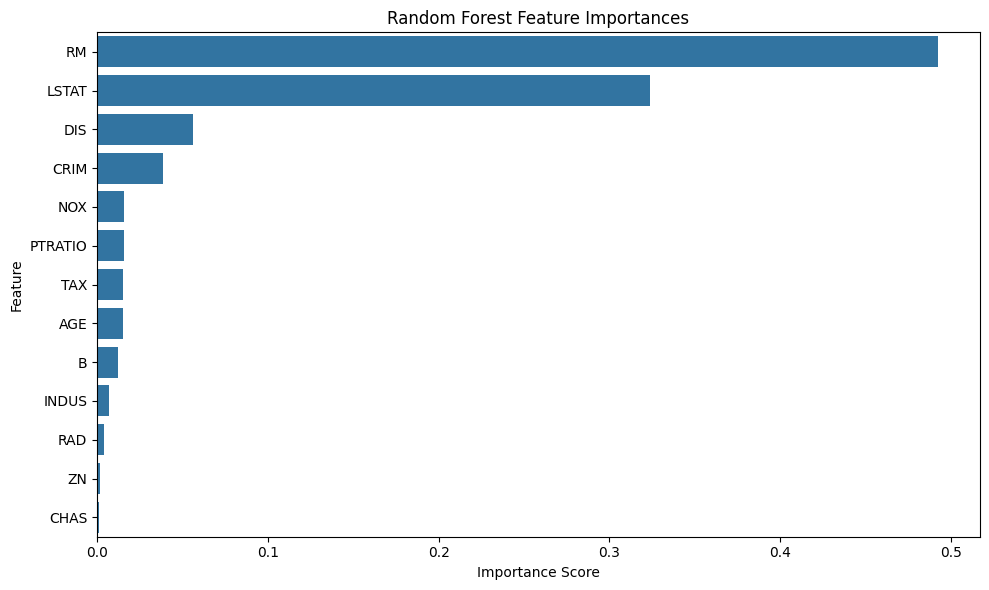

In [25]:
# --- Feature Importance Plot ---
# import matplotlib.pyplot as plt
# import seaborn as sns

# Get feature importances from the trained RF model
feature_importances = pd.Series(
    forest_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


Random Forest is clearly telling us:

* RM (average rooms per dwelling) → ~50% of decision-making weight.

* LSTAT (lower status %) → ~32%, very influential on predicted prices.

* Everything else combined → ~18%, with DIS (distance to employment centers) and CRIM (crime rate) taking small but noticeable roles.

This matches the classic **Boston Housing** insight:

* More rooms = higher prices.

* Higher percentage of lower socio-economic status → lower prices.

* Location factors (distance to work centers, crime rate) still matter, but less than those top 2.

# 7. Wrap-up for Linear Regression and Random Forest

## Key Insights
**Linear Regression:** Easy to interpret, but underfits when relationships are non-linear.

**Random Forest:** Captures non-linear patterns & feature interactions automatically.

Top features in predicting price:

* RM (avg rooms) — strong positive influence

* LSTAT (% lower status) — strong negative influence

* DIS, CRIM — smaller, but location-related impact.

**Scaling** was **not required** for Random Forest.

**When to Use Regression vs. Tree Models:**

*   **Linear Regression:** Suitable when the relationship between features and the target is believed to be approximately linear, or when interpretability of feature impact is a high priority (as the coefficients provide clear insights). It's also computationally less expensive and can be a good baseline model.
*   **Random Forest (Tree-based Models):** More suitable for capturing non-linear relationships and interactions between features. They often provide higher accuracy on complex datasets but are less interpretable than linear models (though feature importance can be extracted). They can also be more prone to overfitting if not tuned properly.

**Limitations of the Dataset:**

As noted at the beginning of the notebook, the Boston Housing dataset has significant limitations and ethical concerns:

*   **Deprecated for Ethical Reasons:** It includes the "B" variable, which is related to race, and the "CHAS" variable, which has been used in potentially biased ways. Using this dataset for real-world predictions is strongly discouraged due to the risk of perpetuating historical biases.
*   **Small Dataset Size:** With only 506 instances, it's a relatively small dataset, which can limit the complexity of models that can be trained without overfitting and may not be representative of larger, more diverse housing markets.
*   **Potential for Outliers and Non-linearities:** The EDA showed some potential outliers and non-linear relationships (e.g., in the scatter plots), which linear models may struggle with. The ceiling effect at $50k for MEDV is another limitation.
*   **Limited Features:** The dataset includes a limited set of features. Real-world housing price prediction would typically involve many more variables (e.g., property condition, specific location details, market trends, etc.).

In conclusion, while this dataset is useful for learning and demonstrating regression techniques, its ethical issues and limitations mean it should **not** be used for building real-world applications.

## 7. Finish task

We have completed the task by performing data preprocessing, training and evaluating Linear Regression and RandomForestRegressor models, comparing their performance, interpreting the Linear Regression coefficients, discussing model applicability, and identifying dataset limitations.

## 8. Model Training (KNN Regressor)

Train a K-Nearest Neighbors Regressor model on the scaled data.

In [19]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize and train the KNeighborsRegressor model
# We'll start with a default of n_neighbors=5
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

print("KNeighborsRegressor model trained.")

KNeighborsRegressor model trained.


## 9. Model Evaluation (KNN Regressor)

Evaluate the KNN Regressor model using MAE, MSE, RMSE, and R² score.

In [20]:
# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNeighborsRegressor Performance (n_neighbors=5):")
print(f"  MAE: {mae_knn:.2f}")
print(f"  MSE: {mse_knn:.2f}")
print(f"  RMSE: {rmse_knn:.2f}")
print(f"  R² Score: {r2_knn:.2f}")

KNeighborsRegressor Performance (n_neighbors=5):
  MAE: 2.61
  MSE: 20.66
  RMSE: 4.55
  R² Score: 0.72


## 10. Model Comparison

Let's compare the performance metrics of Linear Regression, RandomForestRegressor, and KNeighborsRegressor.

| Model                  | MAE  | MSE   | RMSE | R² Score |
|------------------------|------|-------|------|----------|
| Linear Regression      | {{mae_linear:.2f}} | {{mse_linear:.2f}}  | {{rmse_linear:.2f}} | {{r2_linear:.2f}}      |
| RandomForestRegressor  | {{mae_forest:.2f}} | {{mse_forest:.2f}} | {{rmse_forest:.2f}} | {{r2_forest:.2f}}     |
| KNeighborsRegressor    | {{mae_knn:.2f}} | {{mse_knn:.2f}}  | {{rmse_knn:.2f}} | {{r2_knn:.2f}}      |

Based on these metrics, the **RandomForestRegressor** still appears to be the best performing model among the three on this dataset, achieving the lowest MAE, MSE, and RMSE, and the highest R² score. The **KNeighborsRegressor** performed better than Linear Regression but not as well as the RandomForestRegressor.

## 11. Discuss KNN Applicability

**When to Use KNeighborsRegressor:**

*   **Simplicity:** KNN is a conceptually simple algorithm, easy to understand and implement.
*   **No Training Phase (mostly):** The majority of the computation happens during prediction, not training. This can be advantageous if you have a continuously updating dataset.
*   **Non-linear Relationships:** Like Random Forest, KNN can capture non-linear relationships in the data without explicitly defining the functional form.
*   **Multi-modal Data:** KNN can work well with data that has multiple distinct clusters or patterns.

**Considerations for KNN:**

*   **Computational Cost:** Prediction time can be high for large datasets, as it requires calculating distances to all training examples.
*   **Choosing 'k':** The performance is highly dependent on the choice of the number of neighbors (`n_neighbors`). This is a hyperparameter that often needs to be tuned.
*   **Sensitive to Scaling:** KNN is a distance-based algorithm, so it is crucial to scale features before using it (which we did).
*   **Irrelevant Features:** Performance can degrade with a large number of irrelevant features, as they can disproportionately influence distance calculations.

In this case, while KNN performed reasonably well, the ensemble nature of Random Forest seems to give it an edge in capturing the underlying patterns in the Boston Housing dataset.

## 12. Finish task

We have now performed data preprocessing, trained and evaluated Linear Regression, RandomForestRegressor, and KNeighborsRegressor models, compared their performance, interpreted the Linear Regression coefficients, discussed model applicability, and identified dataset limitations.

What could be other models that we could apply here for comparison?
That's a great question! Beyond Linear Regression, Random Forest, and KNN, there are several other regression models you could apply and compare to get a more comprehensive view of which models work best on this dataset. Here are a few suggestions:

* Support Vector Regressor (SVR): SVR is a powerful model that can capture complex non-linear relationships. It works by finding a hyperplane that best fits the data points while allowing for a certain margin of error. It can be a good option for capturing intricate patterns in the data.

* Gradient Boosting Models (e.g., Gradient Boosting Regressor, XGBoost, LightGBM, CatBoost): These are ensemble models that build trees sequentially, with each new tree correcting the errors of the previous ones. They are often high-performing and can capture complex relationships and interactions. XGBoost, LightGBM, and CatBoost are popular optimized implementations of gradient boosting.

* Ridge and Lasso Regression: These are extensions of Linear Regression that add regularization to the model. Ridge adds L2 regularization, which shrinks the coefficients towards zero, while Lasso adds L1 regularization, which can set some coefficients exactly to zero, effectively performing feature selection. These can be useful if you suspect multicollinearity or want to reduce the number of features.

* Decision Tree Regressor: While Random Forest is an ensemble of Decision Trees, training a single Decision Tree Regressor can be a good way to understand the basic building block of the Random Forest and see how a single tree performs compared to the ensemble.

* Neural Networks (e.g., a simple Multi-layer Perceptron Regressor): For more complex datasets, a simple neural network could also be applied. However, for a dataset of this size, they might be prone to overfitting without careful tuning.
The choice of which model to try next depends on what you want to explore. If you want to see how another non-linear model performs, SVR or one of the boosting models would be good choices. If you want to explore regularization with linear models, Ridge or Lasso would be appropriate.

Would you like to try implementing and evaluating one of these models next?